In [1]:
import matplotlib.pyplot as plt
import cv2
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Activation,Dropout,Flatten,Conv2D,MaxPooling2D,Dense
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
cat4 = cv2.imread('DATA/CATS_DOGS/train/CAT/4.jpg')

In [3]:
cat4 = cv2.cvtColor(cat4,cv2.COLOR_BGR2RGB)

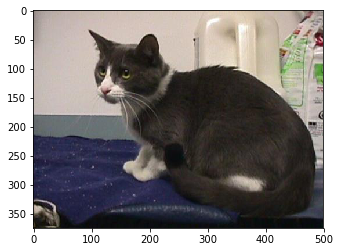

In [4]:
plt.imshow(cat4)

In [5]:
cat4.shape

(375, 500, 3)

In [6]:
dog = cv2.imread('DATA/CATS_DOGS/train/DOG/2.jpg')

In [7]:
dog = cv2.cvtColor(dog,cv2.COLOR_BGR2RGB)

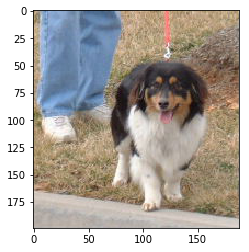

In [8]:
plt.imshow(dog)

In [9]:
dog.shape

(199, 188, 3)

In [10]:
input_shape = (150,150,3)

In [11]:
image_gen = ImageDataGenerator(rotation_range=30,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              rescale=1/255,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              fill_mode='nearest') 
#fill mode is using to fill missing fixel when we use width and height shift transformation

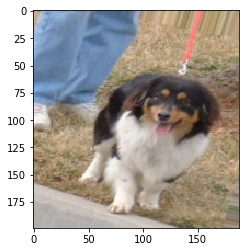

In [12]:
plt.imshow(image_gen.random_transform(dog))

In [13]:
image_gen.flow_from_directory('DATA/CATS_DOGS/train')

Found 18743 images belonging to 2 classes.


In [14]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))

model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)             0         
__________

In [16]:
batch_size = 16

train_image_gen = image_gen.flow_from_directory('DATA/CATS_DOGS/train',target_size=input_shape[:2],batch_size=batch_size,
                                               class_mode='binary')

Found 18743 images belonging to 2 classes.


In [17]:
test_image_gen = image_gen.flow_from_directory('DATA/CATS_DOGS/test',target_size=input_shape[:2],batch_size=batch_size,
                                               class_mode='binary')

Found 6251 images belonging to 2 classes.


In [18]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [19]:
results = model.fit_generator(train_image_gen,epochs=1,steps_per_epoch=150,validation_data=test_image_gen,
                             validation_steps=12)

Epoch 1/1
150/150 [==============================] - 99s 663ms/step - loss: 0.6993 - acc: 0.5292 - val_loss: 0.6915 - val_acc: 0.6034


In [20]:
results.history['acc']

[0.5291666666666667]

In [23]:
#To not lose much training time i uploaded previously trained model which trained for 150 epochs and got %80 accuracy

In [21]:
from keras.models import load_model

In [22]:
new_model = load_model('cat_dog_100epochs.h5')

In [24]:
dog_file = 'DATA/CATS_DOGS/test/DOG/10005.jpg'

In [25]:
from keras.preprocessing import image

In [26]:
dog_img = image.load_img(dog_file,target_size=(150,150))

In [27]:
dog_img = image.img_to_array(dog_img)

In [28]:
dog_img.shape

(150, 150, 3)

In [29]:
import numpy as np

In [30]:
dog_img = np.expand_dims(dog_img,axis=0)

In [31]:
dog_img.shape

(1, 150, 150, 3)

In [32]:
dog_img = dog_img/255

In [33]:
new_model.predict_classes(dog_img)

array([[1]])

In [34]:
model.predict(dog_img)

array([[0.506718]], dtype=float32)